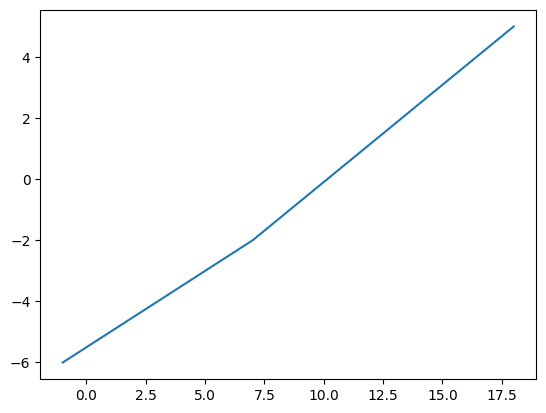

In [1]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([-1, 7, 18])
ypoints = np.array([-6, -2, 5])

plt.plot(xpoints, ypoints)
plt.show()

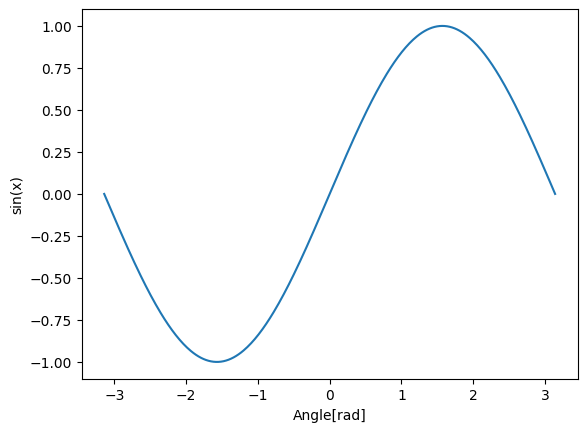

In [2]:
import math

x = np.linspace(-np.pi,np.pi, 360)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('Angle[rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

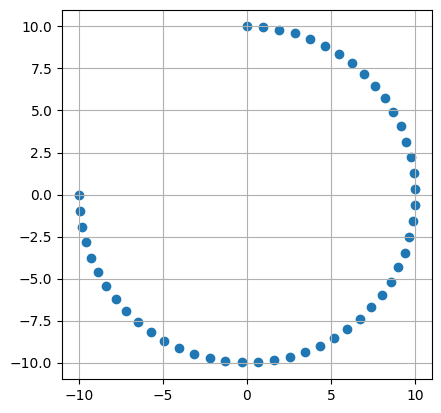

In [3]:
D = 10
theta = np.linspace(-np.pi,np.pi/2, 50)
A = np.zeros(360)
Bx = D*np.cos(theta)
By = D*np.sin(theta)

B = np.column_stack([Bx,By])

fig1 = plt.figure()
ax = fig1.add_subplot(1,1,1)
ax.grid()
ax.set_aspect('equal')
ax.scatter(B[:,0],B[:,1])
plt.show()

In [4]:
#Linkage lengths
a = 38 #horizontal distance between fixed points
b = 41.3 #t1
c = 39.3
d = 40.1 #t1
e = 57.56474616 #t1
f = 39.4
g = 36.7 #t2
h = 61.22001 #t2
i = 49 #t2
j = 50
k = 61.9
l = 7.8 #vertical distance between fixed point
m = 15 #length of driving link
real_lengths = ([a, b, c, d, e, f, g, h, i, j, k, l, m])

In [5]:
def calc_joint(a,b,c,d,e,f,g,h,i,j,k,l,m, theta):
    #Variables of interest
    S0 = math.sqrt(a**2 + l**2)
    beta1 = math.atan(l / a)
    beta2 = np.pi + beta1 - theta
    S1 = math.sqrt(S0**2 + m**2 - 2 * S0 * m * math.cos(beta2))
    beta3 = math.atan((m * math.sin(beta2)) / (S0 - m * math.cos(beta2)))
    beta4 = math.acos((S1**2 + b**2 - j**2)/(2 * S1 * b))
    theta1 = np.pi/2 - beta1 - beta3 - beta4
    beta6 = math.acos((S1**2 + c**2 - k**2)/(2 * S1 * c))
    beta7 = (3*np.pi/2)- beta4 - beta6
    S2 = math.sqrt(d**2 + c**2 - 2 * d * c * math.cos(beta7))
    beta11 = math.acos((c**2 + S2**2 - d**2)/(2 * c * S2)) + math.acos((g**2 + S2**2 - f**2)/(2 * g * S2))
    beta14 = beta6 - beta1 - beta3 - beta11
    print(f"beta14 = {beta14*360/(2*np.pi)}\n")
    #Joint positions
    #fixed point, centre of motor
    A = (0, 0)
    #fixed linkage reference point
    B = (-a, -l)
    #directly driven joint
    H = (m*np.cos(theta), m*np.sin(theta))

    E = (B[0] + b * math.cos(beta4 + beta3 + beta1), B[1] + b * math.sin(beta4 + beta3 + beta1))

    D = (B[0] - d * math.cos(theta1), B[1] + d * math.sin(theta1))

    C = (B[0] + c * math.cos(beta1 + beta3 - beta6), B[1] + c * math.sin(beta1 + beta3 - beta6))

    F = (C[0] - g * math.cos(beta14), g * C[1] + math.sin(beta14))
    print(f"Joint position: C = {C}, F = {F}\n")

    G = (C[0] - i * math.cos(np.pi/2 - beta14), C[1] - i * math.sin(np.pi/2 - beta14))

    joint_pos = ([A, B, C, D, E, F, G, H])

    return joint_pos, beta11, beta14



In [6]:
theta = np.linspace(0,2*np.pi, 3)

joint_pairs = [(0, 7), (1, 4), (1, 3), (1, 2), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (4, 7), (5, 6)]
#joint pairs, m, b, d, c, g, i, k, e, f,  j, h
matching_links = ([m, b, d, c, g, i, k, e, f, j, h])
link_letter = ['m', 'b', 'd', 'c', 'g', 'i', 'k', 'e', 'f', 'j', 'h']
for kk in theta:
    j_pos = calc_joint(a,b,c,d,e,f,g,h,i,j,k,l,m, kk)[0]
    #link length checks
    for index, (ii, jj) in enumerate(joint_pairs):
        length = math.sqrt((j_pos[ii][0] - j_pos[jj][0]) ** 2 + (j_pos[ii][1] - j_pos[jj][1]) ** 2)
        result = matching_links[index] - length
        # if abs(result) > 0.001 and index == 4:
        #     print(f"Diff = {result}, Link = {link_letter[index]}, theta = {kk*360/(2*np.pi)}\n")
    print(f"C = {j_pos[2]}, F = {j_pos[5]}, beta14 = {math.atan((j_pos[5][1]-j_pos[2][1])/(j_pos[5][0]-j_pos[2][0]))*360/(2*np.pi)}")
            


beta14 = 23.85457385496413

Joint position: C = (-26.952107031572965, -45.51517017008116), F = (-60.51700507651665, -1670.0023286357202)

C = (-26.952107031572965, -45.51517017008116), F = (-60.51700507651665, -1670.0023286357202), beta14 = 88.81633204096374
beta14 = -37.68558620418754

Joint position: C = (-65.31506892334365, -36.055565995268715), F = (-94.35861761998893, -1323.8506000005234)

C = (-65.31506892334365, -36.055565995268715), F = (-94.35861761998893, -1323.8506000005234), beta14 = 88.7080314261477
beta14 = 23.85457385496413

Joint position: C = (-26.95210703157297, -45.51517017008117), F = (-60.517005076516654, -1670.0023286357205)

C = (-26.95210703157297, -45.51517017008117), F = (-60.517005076516654, -1670.0023286357205), beta14 = 88.81633204096374


beta14 = 24.559721628544423

Joint position: C = (-53.363390070628384, -43.972589699076245), F = (-86.74308696271723, -1613.3784004507206)

Beta11 = 88.4524057332767
Beta14 = 31.38186652536232


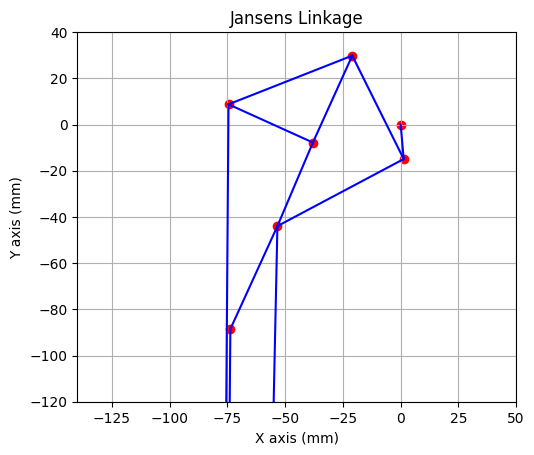

In [7]:
#Plotting joint positions
fig2 = plt.figure()
ax1 = fig2.add_subplot(1,1,1)
ax1.grid()
ax1.set_xlim(-140, 50)
ax1.set_ylim(-120, 40)
ax1.set_aspect('equal')
plt.xlabel('X axis (mm)')
plt.ylabel('Y axis (mm)')
plt.title('Jansens Linkage')
j_pos, b11, b14 = calc_joint(a,b,c,d,e,f,g,h,i,j,k,l,m, 275*2*np.pi/360)
print(f"Beta11 = {b11*360/(2*np.pi)}\nBeta14 = {(b14 * 460)/(2*np.pi)}")
x_coords, y_coords = zip(*j_pos)

ax1.scatter(x_coords, y_coords, color='red')
for ii, jj in joint_pairs:
    plt.plot([j_pos[ii][0], j_pos[jj][0]], [j_pos[ii][1], j_pos[jj][1]], color='blue')

plt.show()


In [8]:
calc_joint(a,b,c,d,e,f,g,h,i,j,k,l,m, (40 * (2*np.pi) / 360))

beta14 = 11.286081338658882

Joint position: C = (-20.82932157456171, -43.15049932335027), F = (-56.81962541982702, -1583.4276172457471)



([(0, 0),
  (-38, -7.8),
  (-20.82932157456171, -43.15049932335027),
  (-77.76060848318537, -2.5938485378498113),
  (-32.63805348162586, 33.15045212856746),
  (-56.81962541982702, -1583.4276172457471),
  (-30.419009713744146, -91.2029485990451),
  (11.49066664678467, 9.641814145298088)],
 0.9216532085839162,
 0.19697927900748669)

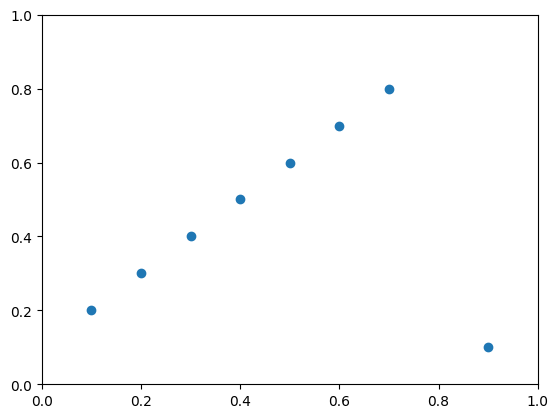

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Example data: List of frames, each containing a list of (x, y) coordinates
frames = [
    [(0.1, 0.2), (0.3, 0.4), (0.5, 0.6), (0.7, 0.8), (0.9, 0.1), (0.2, 0.3), (0.4, 0.5), (0.6, 0.7)],
    [(0.2, 0.3), (0.4, 0.5), (0.6, 0.7), (0.8, 0.9), (0.1, 0.2), (0.3, 0.4), (0.5, 0.6), (0.7, 0.8)],
    [(0.3, 0.4), (0.5, 0.6), (0.7, 0.8), (0.9, 0.1), (0.2, 0.3), (0.4, 0.5), (0.6, 0.7), (0.8, 0.9)]
]

# Number of points
num_points = len(frames[0])

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Create a scatter plot for the points (initially empty)
scat = ax.scatter([], [])

# Function to update the scatter plot for each frame
def update(frame):
    # Get the x, y coordinates for the current frame
    frame_data = frames[frame]
    x = [point[0] for point in frame_data]
    y = [point[1] for point in frame_data]
    
    # Update the scatter plot with new positions
    scat.set_offsets(np.c_[x, y])
    return scat,

# Create the animation
num_frames = len(frames)
ani = FuncAnimation(fig, update, frames=num_frames, interval=200, blit=True)

# Show the animation
plt.show()


In [10]:
# #Plotting joint positions
# fig2 = plt.figure()
# ax2 = fig2.add_subplot(1,1,1)
# ax2.grid()
# ax2.set_xlim(-140, 50)
# ax2.set_ylim(-120, 40)
# ax2.set_aspect('equal')
# plt.xlabel('X axis (mm)')
# plt.ylabel('Y axis (mm)')
# plt.title('Jansens Linkage')
# j_pos, b11, b14 = calc_joint(a,b,c,d,e,f,g,h,i,j,k,l,m, theta[275])
# print(f"Beta11 = {b11*360/(2*np.pi)}\nBeta14 = {(b14 * 460)/(2*np.pi)}")
# x_coords, y_coords = zip(*j_pos)

# ax2.scatter(x_coords, y_coords, color='red')
# for ii, jj in joint_pairs:
#     plt.plot([j_pos[ii][0], j_pos[jj][0]], [j_pos[ii][1], j_pos[jj][1]], color='blue')
# plt.figure(fig2.number)
# plt.show(block = False)